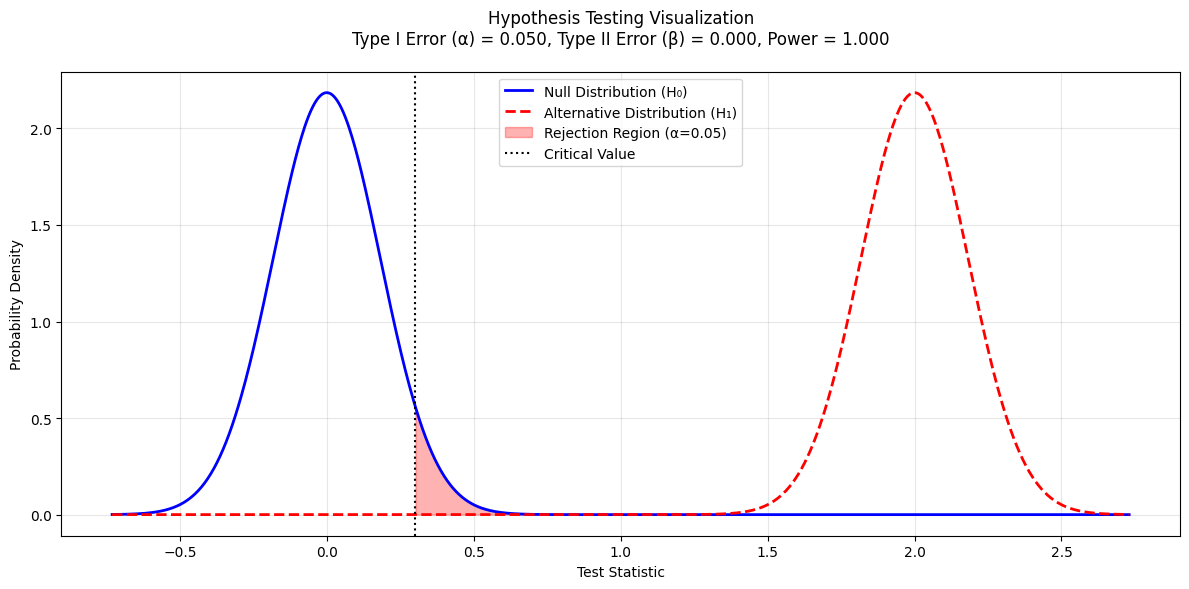

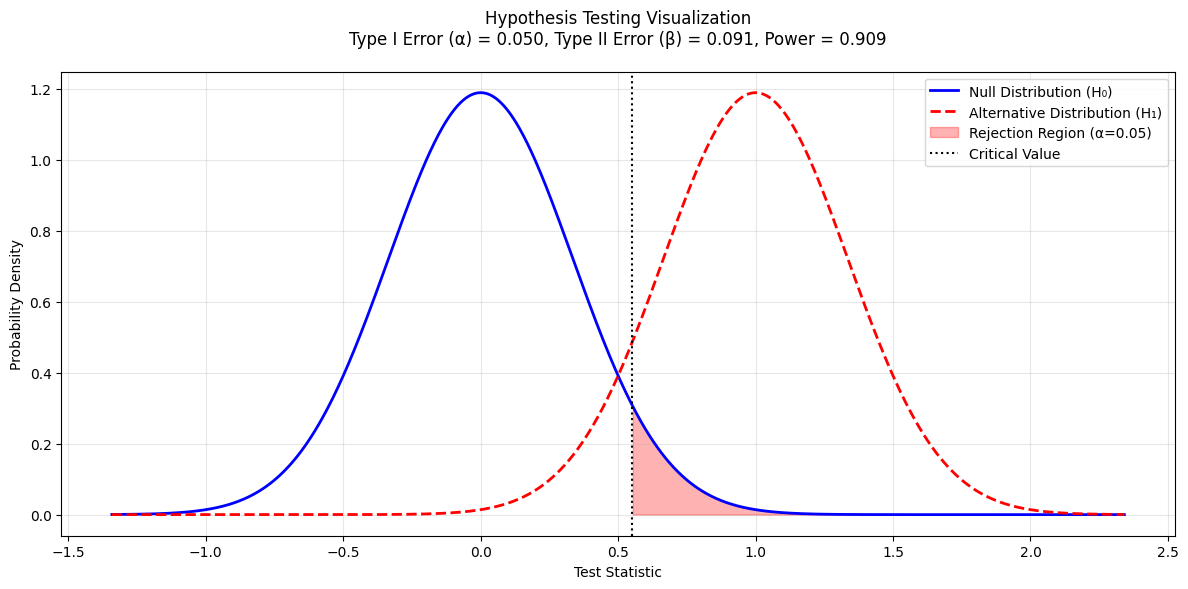

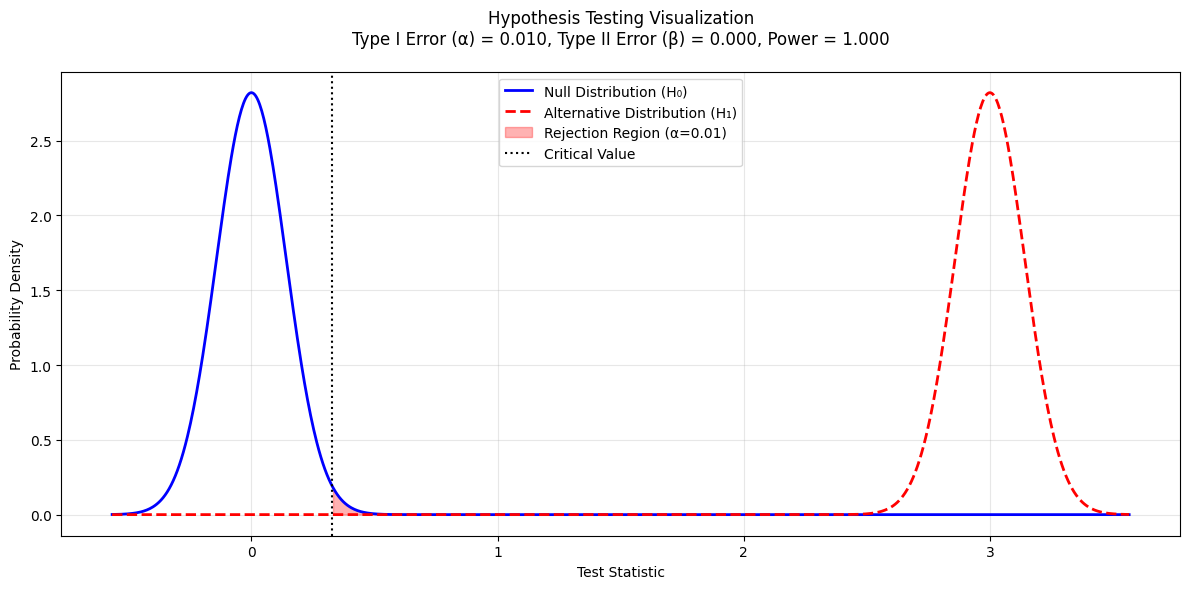

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

# Set style for better visualization
np.random.seed(42)

def visualize_hypothesis_test(mu0=0, mu_alt=2, sigma=1, n=30, alpha=0.05):
    """
    Visualize hypothesis testing concepts using normal distribution
    
    Parameters:
    mu0: null hypothesis mean
    mu_alt: alternative hypothesis mean
    sigma: standard deviation
    n: sample size
    alpha: significance level
    """
    
    # Calculate standard error
    se = sigma / np.sqrt(n)
    
    # Create x range for plotting
    x = np.linspace(mu0 - 4*se, mu_alt + 4*se, 1000)
    
    # Calculate null and alternative distributions
    null_dist = norm.pdf(x, mu0, se)
    alt_dist = norm.pdf(x, mu_alt, se)
    
    # Calculate critical value
    z_crit = norm.ppf(1 - alpha)
    crit_value = mu0 + z_crit * se
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot distributions
    plt.plot(x, null_dist, 'b-', label='Null Distribution (H₀)', linewidth=2)
    plt.plot(x, alt_dist, 'r--', label='Alternative Distribution (H₁)', linewidth=2)
    
    # Shade rejection region
    reject_x = x[x >= crit_value]
    reject_y = norm.pdf(reject_x, mu0, se)
    plt.fill_between(reject_x, reject_y, alpha=0.3, color='red', 
                     label=f'Rejection Region (α={alpha})')
    
    # Add vertical lines for critical value
    plt.axvline(x=crit_value, color='k', linestyle=':', 
                label='Critical Value')
    
    # Calculate and display Type I and II error rates
    type_1_error = 1 - norm.cdf(crit_value, mu0, se)
    type_2_error = norm.cdf(crit_value, mu_alt, se)
    power = 1 - type_2_error
    
    # Add annotations
    plt.title('Hypothesis Testing Visualization\n' + 
             f'Type I Error (α) = {type_1_error:.3f}, ' +
             f'Type II Error (β) = {type_2_error:.3f}, ' +
             f'Power = {power:.3f}', 
             pad=20)
    plt.xlabel('Test Statistic')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage
# Default case
visualize_hypothesis_test()

# More challenging to detect difference
visualize_hypothesis_test(mu0=0, mu_alt=1, sigma=1.5, n=20, alpha=0.05)

# Easier to detect difference
visualize_hypothesis_test(mu0=0, mu_alt=3, sigma=1, n=50, alpha=0.01)

In [11]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']



Summary Statistics:
Observed t-statistic (t_obs): 2.5000
Degrees of freedom (df): 20
Significance level (α): 0.05

P-values:
Right-tailed test: 0.0106
Left-tailed test: 0.9894
Two-sided test: 0.0212

Critical Values:
Right-tailed: 1.7247
Left-tailed: -1.7247
Two-sided: ±2.0860


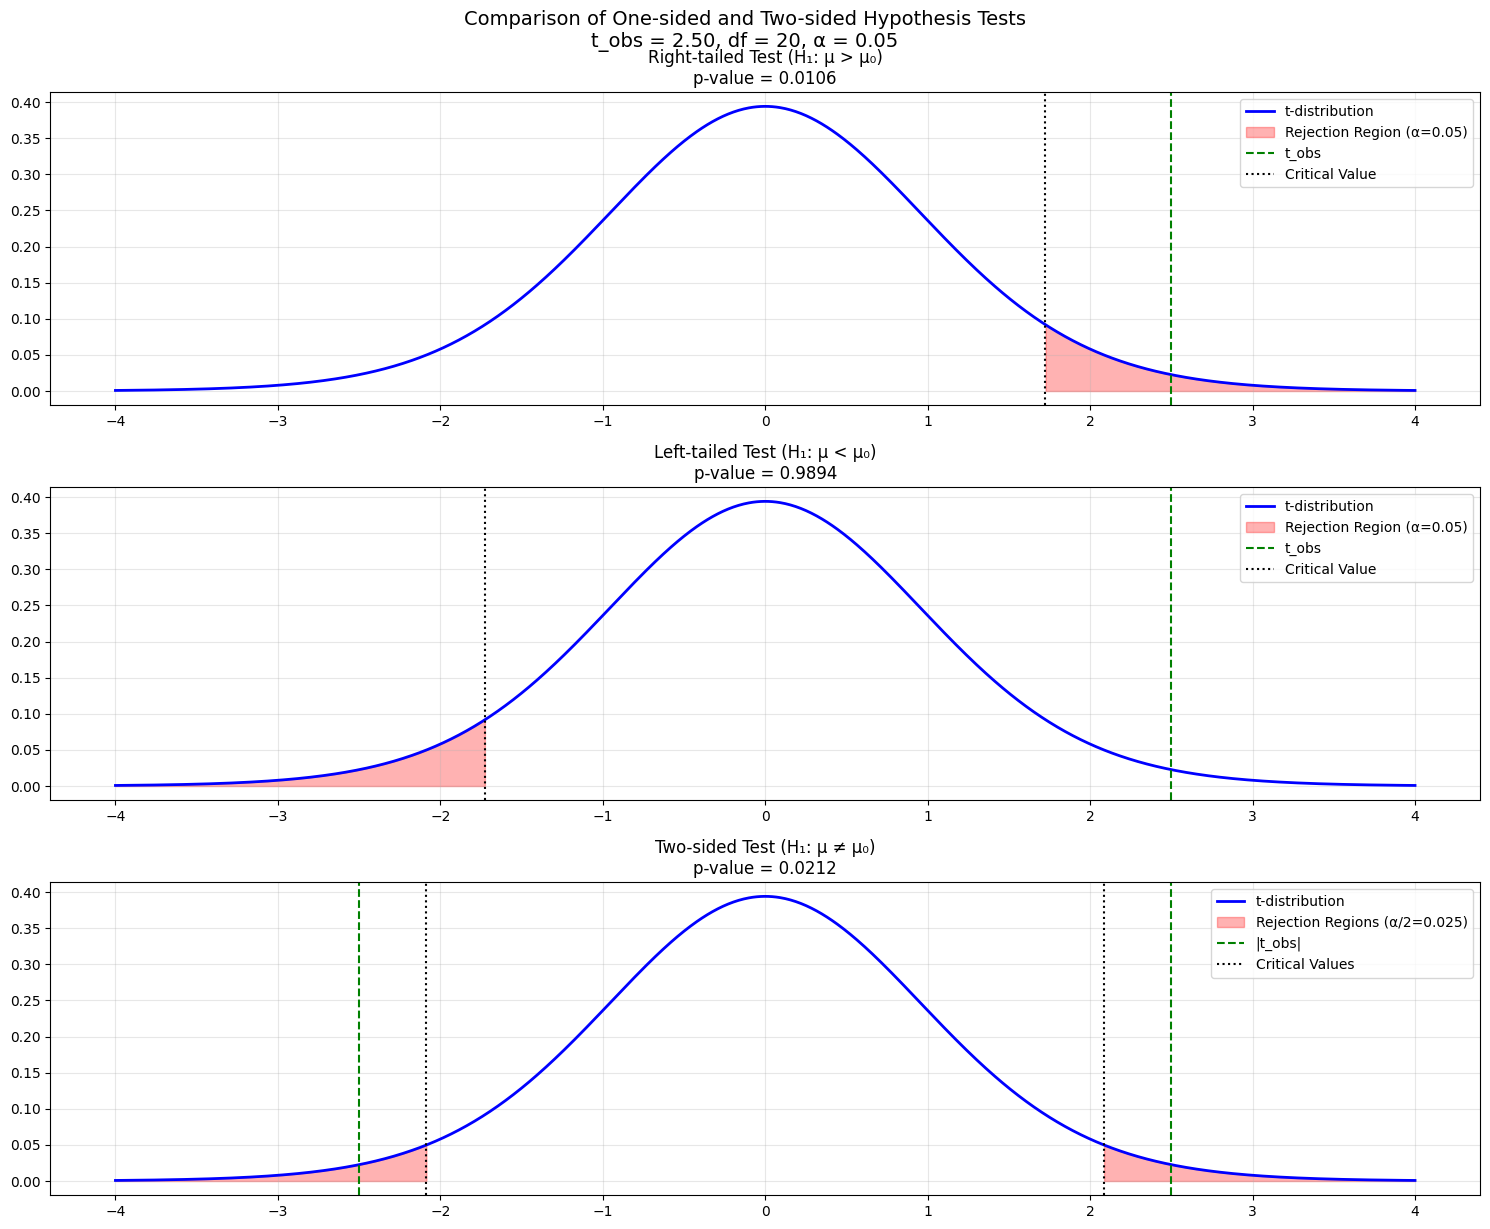


Summary Statistics:
Observed t-statistic (t_obs): -2.5000
Degrees of freedom (df): 20
Significance level (α): 0.05

P-values:
Right-tailed test: 0.9894
Left-tailed test: 0.0106
Two-sided test: 0.0212

Critical Values:
Right-tailed: 1.7247
Left-tailed: -1.7247
Two-sided: ±2.0860


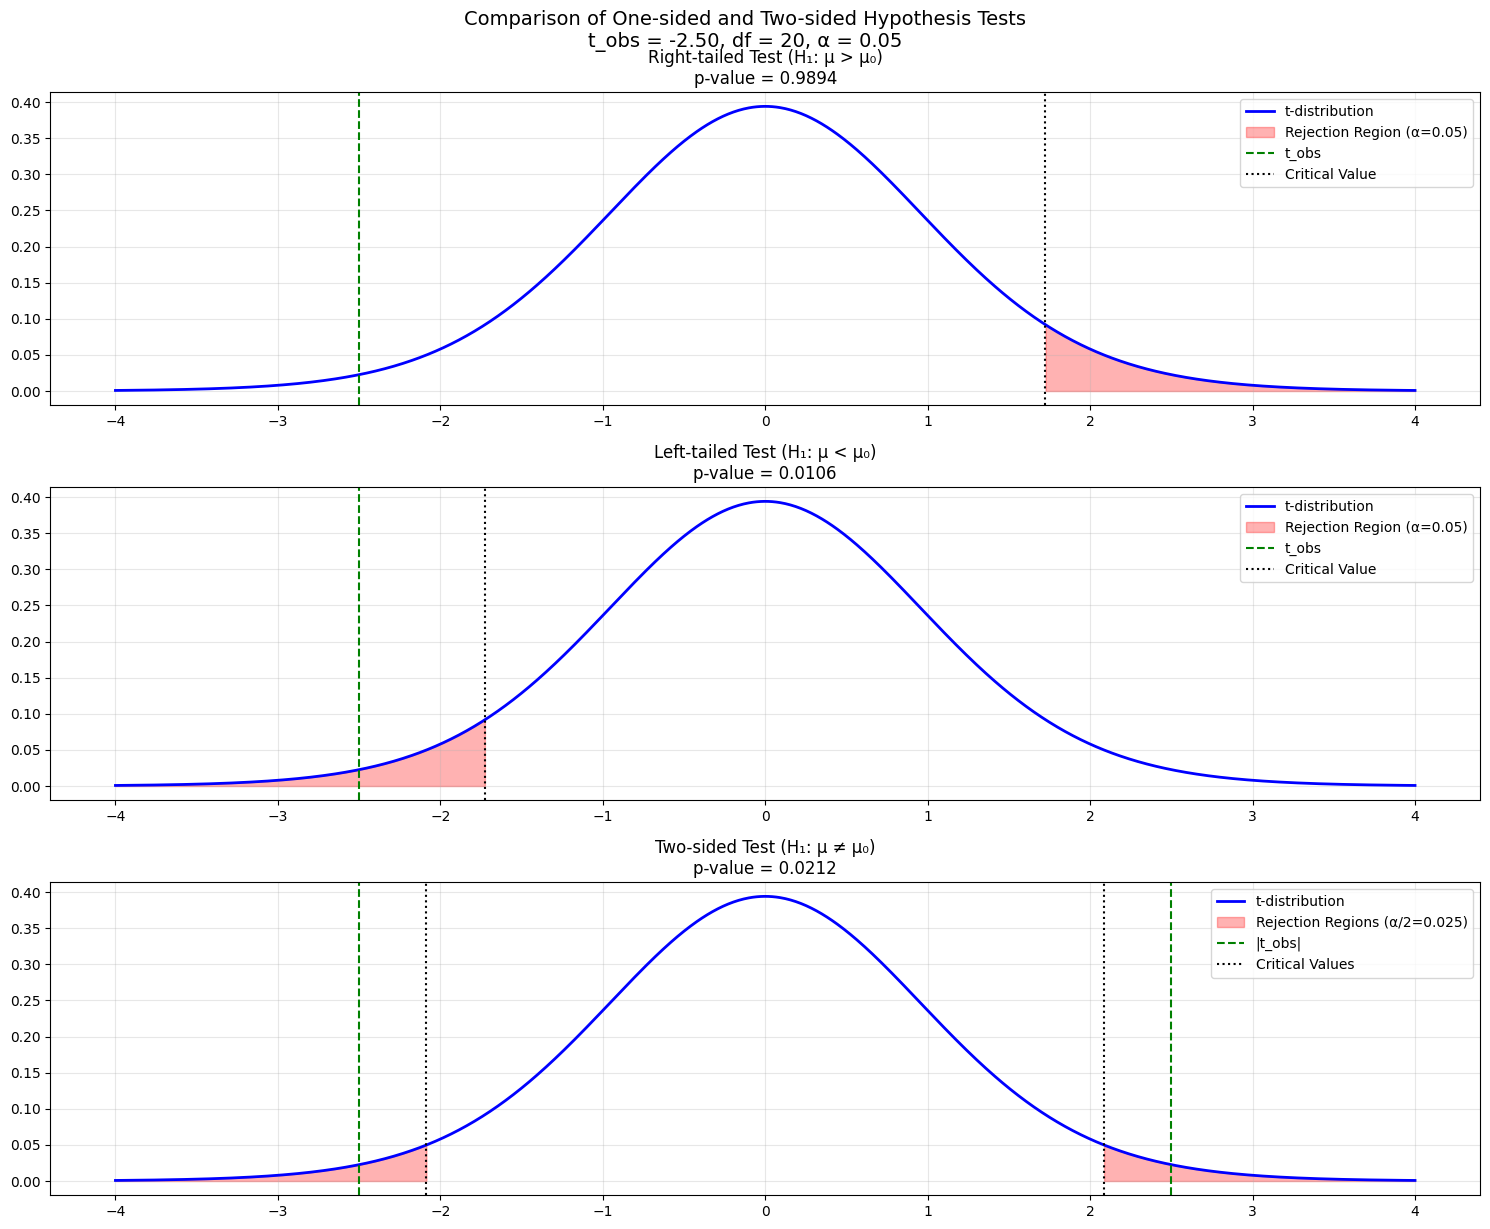


Summary Statistics:
Observed t-statistic (t_obs): 1.9600
Degrees of freedom (df): 20
Significance level (α): 0.05

P-values:
Right-tailed test: 0.0320
Left-tailed test: 0.9680
Two-sided test: 0.0641

Critical Values:
Right-tailed: 1.7247
Left-tailed: -1.7247
Two-sided: ±2.0860


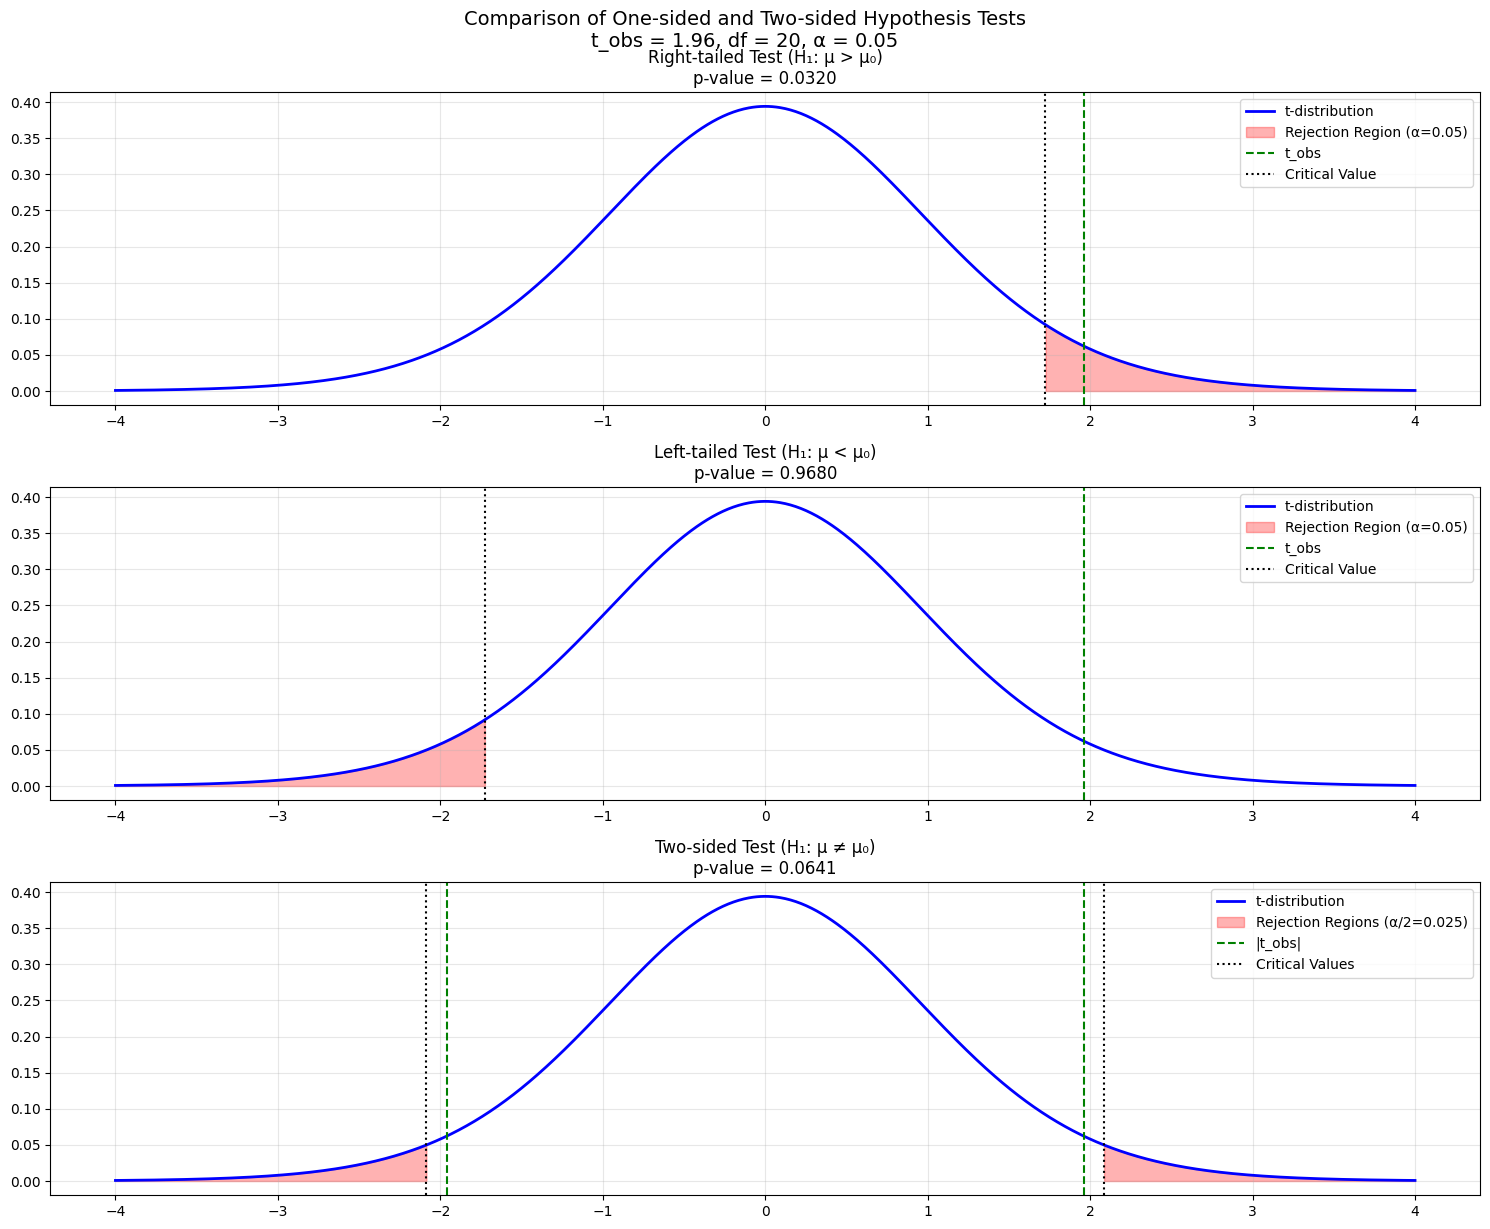


Summary Statistics:
Observed t-statistic (t_obs): 0.5000
Degrees of freedom (df): 20
Significance level (α): 0.05

P-values:
Right-tailed test: 0.3113
Left-tailed test: 0.6887
Two-sided test: 0.6225

Critical Values:
Right-tailed: 1.7247
Left-tailed: -1.7247
Two-sided: ±2.0860


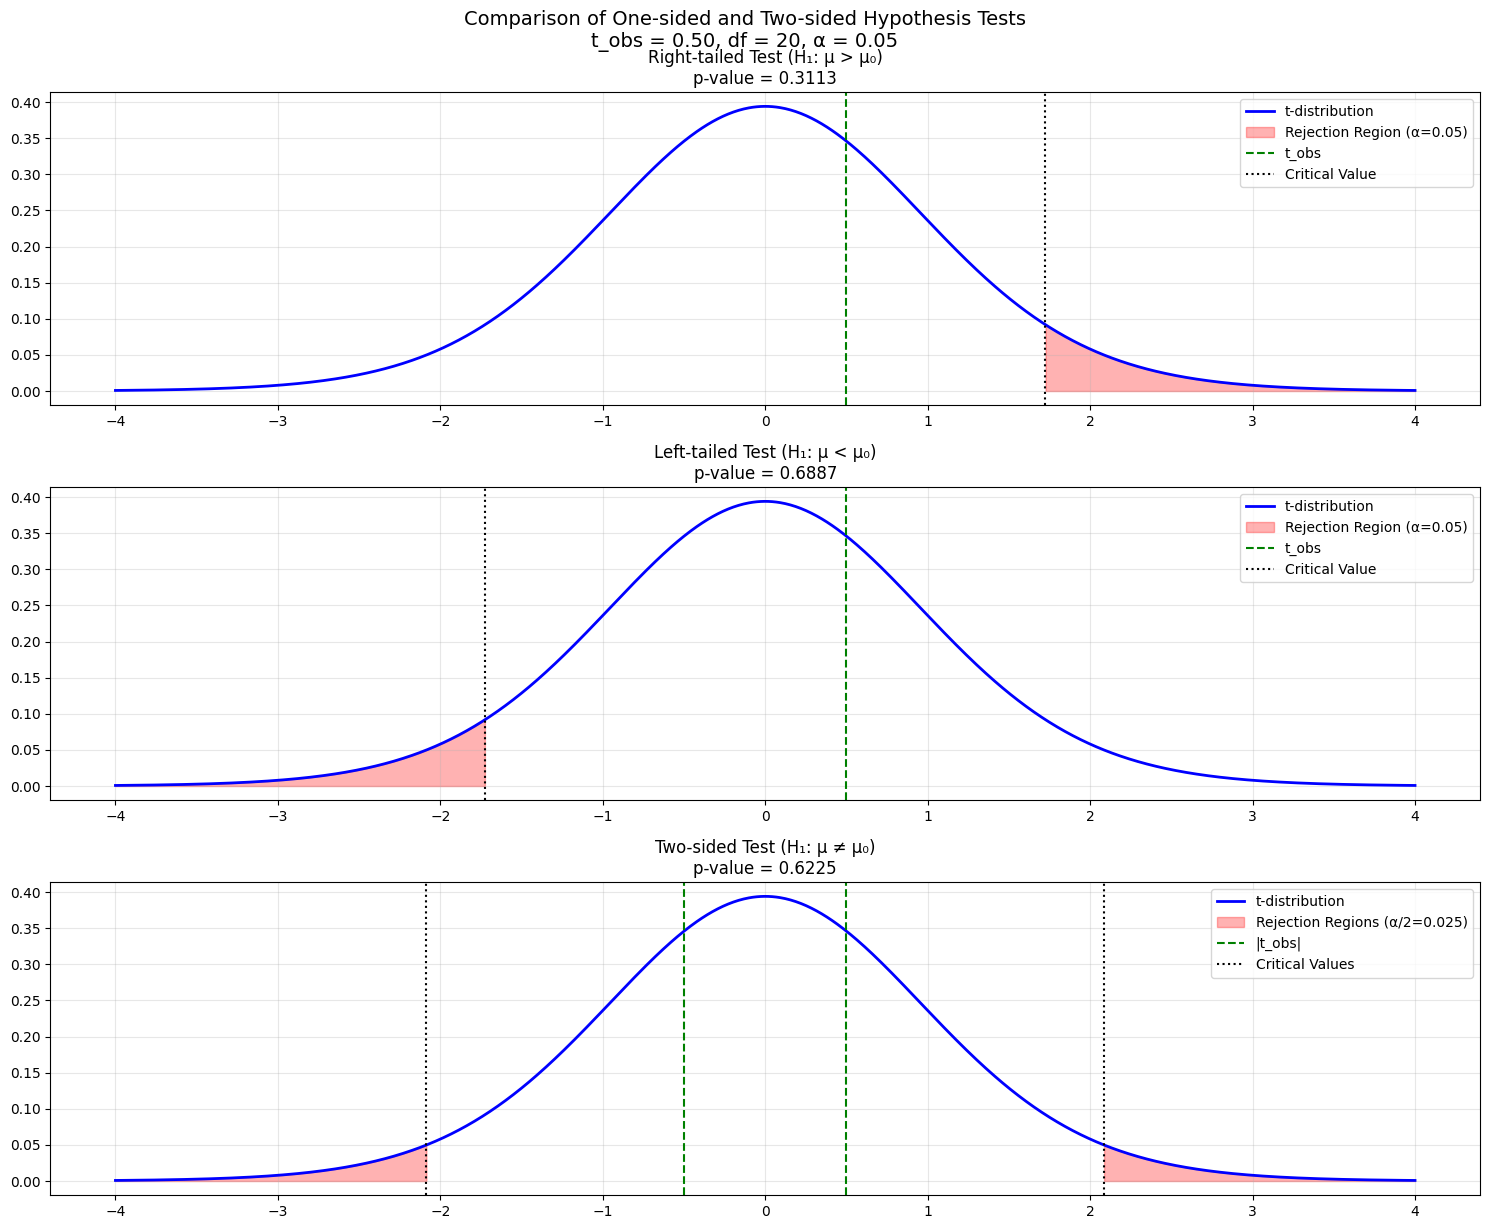

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def plot_hypothesis_tests(t_obs=2.1, df=20, alpha=0.05, figsize=(15, 12)):
    """
    Create comprehensive visualizations for one-sided and two-sided hypothesis tests
    
    Parameters:
    -----------
    t_obs : float
        Observed t-statistic value
    df : int
        Degrees of freedom for t-distribution
    alpha : float
        Significance level (default 0.05)
    figsize : tuple
        Figure size for the plot
    """

    
    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)
    
    # Generate x values for t-distribution
    x = np.linspace(-4, 4, 1000)
    t_dist = stats.t.pdf(x, df)
    
    # 1. Right-tailed test (H₁: μ > μ₀)
    ax1.plot(x, t_dist, 'b-', lw=2, label='t-distribution')
    
    # Critical value for right-tailed test
    t_crit_right = stats.t.ppf(1 - alpha, df)
    
    # Shade rejection region
    reject_x = x[x >= t_crit_right]
    reject_y = stats.t.pdf(reject_x, df)
    ax1.fill_between(reject_x, reject_y, color='red', alpha=0.3, 
                     label=f'Rejection Region (α={alpha})')
    
    # Add observed t-statistic
    ax1.axvline(x=t_obs, color='g', linestyle='--', label='t_obs')
    ax1.axvline(x=t_crit_right, color='k', linestyle=':', label='Critical Value')
    
    # Calculate p-value for right-tailed test
    p_right = 1 - stats.t.cdf(t_obs, df)
    
    ax1.set_title(f'Right-tailed Test (H₁: μ > μ₀)\np-value = {p_right:.4f}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Left-tailed test (H₁: μ < μ₀)
    ax2.plot(x, t_dist, 'b-', lw=2, label='t-distribution')
    
    # Critical value for left-tailed test
    t_crit_left = stats.t.ppf(alpha, df)
    
    # Shade rejection region
    reject_x = x[x <= t_crit_left]
    reject_y = stats.t.pdf(reject_x, df)
    ax2.fill_between(reject_x, reject_y, color='red', alpha=0.3,
                     label=f'Rejection Region (α={alpha})')
    
    # Add observed t-statistic
    ax2.axvline(x=t_obs, color='g', linestyle='--', label='t_obs')
    ax2.axvline(x=t_crit_left, color='k', linestyle=':', label='Critical Value')
    
    # Calculate p-value for left-tailed test
    p_left = stats.t.cdf(t_obs, df)
    
    ax2.set_title(f'Left-tailed Test (H₁: μ < μ₀)\np-value = {p_left:.4f}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Two-sided test (H₁: μ ≠ μ₀)
    ax3.plot(x, t_dist, 'b-', lw=2, label='t-distribution')
    
    # Critical values for two-sided test
    t_crit_two_sided = stats.t.ppf(1 - alpha/2, df)
    
    # Shade rejection regions
    reject_x_right = x[x >= t_crit_two_sided]
    reject_x_left = x[x <= -t_crit_two_sided]
    reject_y_right = stats.t.pdf(reject_x_right, df)
    reject_y_left = stats.t.pdf(reject_x_left, df)
    
    ax3.fill_between(reject_x_right, reject_y_right, color='red', alpha=0.3, 
                     label=f'Rejection Regions (α/2={alpha/2})')
    ax3.fill_between(reject_x_left, reject_y_left, color='red', alpha=0.3)
    
    # Add observed t-statistic and its negative
    ax3.axvline(x=t_obs, color='g', linestyle='--', label='|t_obs|')
    ax3.axvline(x=-t_obs, color='g', linestyle='--')
    ax3.axvline(x=t_crit_two_sided, color='k', linestyle=':', label='Critical Values')
    ax3.axvline(x=-t_crit_two_sided, color='k', linestyle=':')
    
    # Calculate p-value for two-sided test
    p_two_sided = 2 * min(p_right, p_left)
    
    ax3.set_title(f'Two-sided Test (H₁: μ ≠ μ₀)\np-value = {p_two_sided:.4f}')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Adjust layout and add overall title
    plt.tight_layout()
    fig.suptitle('Comparison of One-sided and Two-sided Hypothesis Tests\n' + 
                 f't_obs = {t_obs:.2f}, df = {df}, α = {alpha}', 
                 y=1.02, fontsize=14)
    
    # Print summary statistics
    print(f"\nSummary Statistics:")
    print(f"{'='*50}")
    print(f"Observed t-statistic (t_obs): {t_obs:.4f}")
    print(f"Degrees of freedom (df): {df}")
    print(f"Significance level (α): {alpha}")
    print(f"\nP-values:")
    print(f"Right-tailed test: {p_right:.4f}")
    print(f"Left-tailed test: {p_left:.4f}")
    print(f"Two-sided test: {p_two_sided:.4f}")
    print(f"\nCritical Values:")
    print(f"Right-tailed: {t_crit_right:.4f}")
    print(f"Left-tailed: {t_crit_left:.4f}")
    print(f"Two-sided: ±{t_crit_two_sided:.4f}")
    
    plt.show()

# Example usage with different scenarios
# 1. Strong evidence against H₀ (large positive t_obs)
plot_hypothesis_tests(t_obs=2.5, df=20, alpha=0.05)

# 2. Strong evidence against H₀ (large negative t_obs)
plot_hypothesis_tests(t_obs=-2.5, df=20, alpha=0.05)

# 3. Borderline case
plot_hypothesis_tests(t_obs=1.96, df=20, alpha=0.05)

# 4. No evidence against H₀
plot_hypothesis_tests(t_obs=0.5, df=20, alpha=0.05)